In [20]:

# Load the CSV file into a DataFrame
path = "/500_Reddit_users_posts_labels (1).csv"


In [21]:
# Pandas DataFrame, providing a powerful and flexible tool for data manipulation and analysis in Python.
import pandas as pd


In [22]:
df = pd.read_csv(path)

In [23]:
df.head(10)

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation
5,user-5,"['Since I dont know what DBT is, would you min...",Supportive
6,user-6,"['No matter what you ever think, there will be...",Supportive
7,user-7,"['Dont see it as failing at killing yourself, ...",Ideation
8,user-8,['The reason I have faith in our species abili...,Supportive
9,user-9,['A book is usually what I do when Im getting ...,Ideation


In [48]:
# trying to find missing values

In [24]:
df.isnull().sum()

User     0
Post     0
Label    0
dtype: int64

In [25]:
# Let's check for duplicate values.
df.duplicated().sum()

0

In [26]:
df.shape

(500, 3)

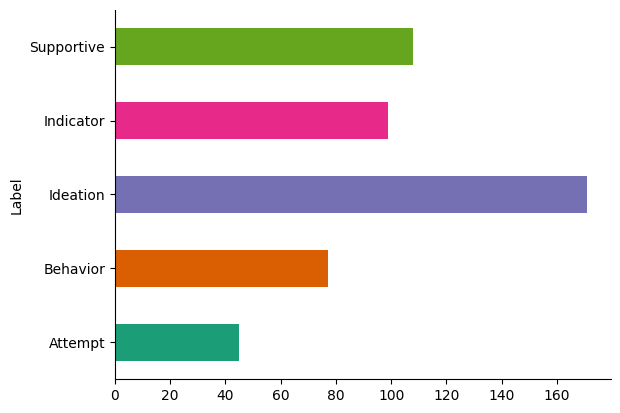

In [28]:
#visualization of the data
# Assuming you have loaded or created your DataFrame
_df_0 = pd.read_csv('/500_Reddit_users_posts_labels (1).csv')

# Visualization of the data
from matplotlib import pyplot as plt
import seaborn as sns

_df_0.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)


In [29]:
#the count of unique values in the 'Label' column of the DataFrame df
df['Label'].value_counts()

Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: Label, dtype: int64

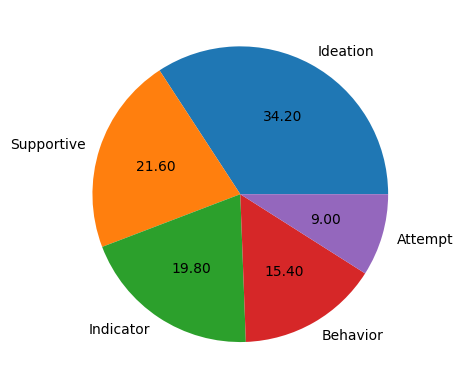

In [30]:
import matplotlib.pyplot as plt


labels = df['Label'].value_counts().index
sizes = df['Label'].value_counts()

plt.pie(sizes, labels=labels, autopct="%0.2f")
plt.show()


In [55]:
#. Data Preprocessing:

In [31]:
 #this code imports the necessary libraries such as cleaning, tokenization, and stemming/lemmatization, commonly used in natural language processing (NLP) and text mining applications
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string



In [32]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
df = pd.read_csv('/500_Reddit_users_posts_labels (1).csv')

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Alternatively, you can use stemming
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [34]:
df['Preprocessed_Post'] = df['Post'].apply(preprocess_text)

# Display the preprocessed data
print(df[['Post', 'Preprocessed_Post']].head())

                                                Post  \
0  ['Its not a viable option, and youll be leavin...   
1  ['It can be hard to appreciate the notion that...   
2  ['Hi, so last night i was sitting on the ledge...   
3  ['I tried to kill my self once and failed badl...   
4  ['Hi NEM3030. What sorts of things do you enjo...   

                                   Preprocessed_Post  
0  viable option youll leaving wife behind youd p...  
1  hard appreciate notion could meet someone else...  
2  hi last night sitting ledge window contemplati...  
3  tried kill self failed badly cause moment want...  
4  hi nem sort thing enjoy personally always welc...  


In [37]:
# model building.
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:

# Load the dataset
df = pd.read_csv('/500_Reddit_users_posts_labels (1).csv')

In [39]:
# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [40]:

# Apply the preprocessing function to the 'Post' column
df['Preprocessed_Post'] = df['Post'].apply(preprocess_text)

In [41]:

# Convert labels to integer type
df['Label'] = df['Label'].astype('category').cat.codes

In [42]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Preprocessed_Post'], df['Label'], test_size=0.1, random_state=42
)

In [43]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)

In [44]:
# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [45]:

# Pad sequences to have the same length
max_sequence_length = 100
train_data_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [46]:
# Build the LSTM model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(50))
model.add(Dense(5, activation='softmax'))

In [47]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Train the model
model.fit(train_data_padded, train_labels, epochs=2, validation_split=0.1)
#2 epochs because val_accuracy: 0.4000


Epoch 1/2
13/13 [==============================] - 3s 106ms/step - loss: 1.5979 - accuracy: 0.3160 - val_loss: 1.5676 - val_accuracy: 0.4000
Epoch 2/2
13/13 [==============================] - 1s 56ms/step - loss: 1.5238 - accuracy: 0.3481 - val_loss: 1.4981 - val_accuracy: 0.4000


In [49]:
# Evaluate the model on the test set
accuracy = model.evaluate(test_data_padded, test_labels)[1]
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 17ms/step - loss: 1.6192 - accuracy: 0.2400
Test Accuracy: 0.23999999463558197


In [50]:
# Example definition of 'new_data' as a list of strings
new_data = ['life. Many of my friends have chosen the military because they believe its a character-shaping experience. I dont know if I put that well. Read about [Ludwig Wittgenstein](http://en.wikipedia.org/wiki/Ludwig_Wittgenstein). Ive always found amazing and brave the fact that he volunteered for WWI because he thought (Im quoting my textbook, I had to take it out just to write this) the experience of confrontation with death perfects and ennobles men.*hugs him***EDIT:** Also, you should find something that makes you feel calm, something that relieves you from Stress, and do it constantly, get better at it. For me is the piano. I cant sit alone and play it with headphones for hours, and no matter whatever it was I should be doing at that moment, I never regret time spent playing. Also, Im not Tired good at it, but Im the one whos listening to it, and thats all I care about. I dont think you need to be good at doing something to enjoy the hell out of it. That, and masturbation. But I cant get *better* at jerking off, so it isnt as exciting and engaging. Thats why I dont think smoking pot is a good idea, at least not something you should do all the time. Get a hobby you can practice by yourself and not be bothered by anyone, and smoke some pot and jerk off every once in a while. Sounds depressing, but if Stress is what youre going through, Ive found theres no better thing to do than to keep yourself entertained and/or occupied. Sorry for long text, I hope its helped in any way.', 'Heres a hug from a fellow gay person going through somewhat similar (actually, pretty similar) circumstances. *internet hug*. Im not gonna rant about my life, but I want you to know youre not alone out there. If you want to talk, Ive got lots of things to say, Ill be right here. PM me if you like']


In [51]:
# Preprocess the new data
new_data_sequences = tokenizer.texts_to_sequences(new_data)
new_data_padded = pad_sequences(new_data_sequences, maxlen=max_sequence_length)

In [52]:
# Make predictions
predictions = model.predict(new_data_padded)

# Convert predicted probabilities to class labels
predicted_labels = [int(round(prediction.argmax())) for prediction in predictions]

# Display the predicted labels
print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 0s 467ms/step
Predicted Labels: [2, 2]


In [94]:
# Define a mapping dictionary
class_mapping = {
    0: 'Supportive',
    1: 'Indicator',
    2: 'Ideation',
    3: 'Behaviour',
    4: 'Attempt'
}

# Map predicted labels to class names
predicted_class_names = [class_mapping[label] for label in predicted_labels]

# Display the mapped class names
print("Mapped Predicted Class Names:", predicted_class_names)


Mapped Predicted Class Names: ['Ideation', 'Attempt']
